In [0]:
!pip install face_recognition

[-0.07444756  0.0349806   0.07273617 -0.059142   -0.06361317 -0.04683416
 -0.07549586 -0.11883379  0.12556033 -0.10577658  0.23252398 -0.07607003
 -0.23531234 -0.06317507 -0.05295949  0.21582711 -0.16054611 -0.12357058
 -0.10265387 -0.05140973  0.06332883 -0.04596993  0.04988658  0.03909935
 -0.10859575 -0.37902662 -0.12327593 -0.06590772 -0.00454662 -0.06544332
 -0.07222491  0.03768658 -0.17142421 -0.01797886  0.0116419   0.09726366
 -0.00674066 -0.14483789  0.17085074 -0.02558799 -0.28528702  0.00778946
  0.06131962  0.18630557  0.23148017  0.070248    0.01368714 -0.1238746
  0.15143639 -0.1796876   0.03556271  0.13580886  0.01246027  0.04997488
 -0.00936052 -0.07763345  0.06041431  0.13959581 -0.14848866 -0.09548088
  0.06956036 -0.12677562 -0.05123013 -0.06524903  0.17923383  0.1419118
 -0.11263615 -0.17973275  0.12120939 -0.19618198 -0.03313473  0.06095239
 -0.15698899 -0.15710221 -0.3125636  -0.00556648  0.37933403  0.04217856
 -0.15694089  0.02234439 -0.02722985  0.01443241  0.1

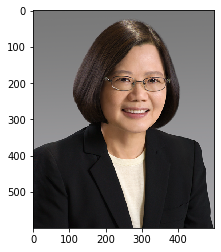

In [9]:
%matplotlib inline
import face_recognition
import matplotlib.pyplot as plt
img = face_recognition.load_image_file("inwen.png")
en = face_recognition.face_encodings(img)
print(en[0])
plt.imshow(img)

In [10]:
import glob
encodings = []
names = []
fs = glob.glob("*.jpg") + glob.glob("*.png")
for fname in fs:
    img = face_recognition.load_image_file(fname)
    en = face_recognition.face_encodings(img)
    encodings.append(en[0])
    names.append(fname.split(".")[0])
print(names)
print(encodings)

['ashin', 'yui', 'clock', 'inwen']
[array([-0.05617967,  0.02983022,  0.06340735, -0.03832327, -0.15999405,
       -0.06248014, -0.07351041, -0.11824904,  0.04777159, -0.11633807,
        0.24704184, -0.06191868, -0.19050641, -0.08541765, -0.08118092,
        0.19174647, -0.12689963, -0.12095881, -0.09166251,  0.05442925,
        0.08355905,  0.01255169,  0.05069135, -0.01818765, -0.03084211,
       -0.31813735, -0.10261878, -0.07335767,  0.03355611, -0.00949483,
       -0.05021567, -0.03819716, -0.16331533, -0.07178051,  0.04055745,
        0.06823848, -0.0460913 , -0.06695341,  0.18325685, -0.00974252,
       -0.27496043,  0.02855642,  0.0347567 ,  0.18860276,  0.19746779,
        0.07033848,  0.07381824, -0.16421644,  0.10292752, -0.18854186,
        0.07780245,  0.08649211,  0.10596492,  0.05011007,  0.00100893,
       -0.11861143,  0.0449011 ,  0.18121898, -0.11324728,  0.06588717,
        0.15037572, -0.0305625 ,  0.00763328, -0.07872266,  0.22662911,
        0.01769539, -0.14075